In [1]:
import matplotlib.pyplot as plt
import pandas
import re


In [2]:
dataset=pandas.read_csv('naukri4000.csv')
dataset.head()

,Unnamed: 0,Title,Company,Location,Description,Link,KeySkills,Experience,Salary,Industry,Functional Area,Role Category,Role,EmploymentType,UG,PG,Doctorate
0,0,Senior Lead - Artificial Intelligence/machine ...,CenturyLink Technologies India Pvt Ltd,Bengaluru,NaN,https://www.naukri.com/job-listings-Senior-Lea...,"Deep Learning, Machine Learning, Data Mining, ...",12-16 yrs,Not Disclosed by Recruiter,IT-Software / Software Services,"IT Software - Application Programming , ...",Programming & Design,Team Lead/Technical Lead,"Permanent Job, Full Time",B.Tech/B.E. - Any Specialization,"M.Tech - Any Specialization, MCA - Computers",NaN
1,1,Machine Learning/nlp Experts (location Chakala...,Taglr Technologies Private Limited,"Mumbai, Mumbai Suburbs",- 3-5 yrs of experience with ML tools and libr...,https://www.naukri.com/job-listings-Machine-Le...,"Deep Learning, Computer Vision, Image Processi...",4-9 yrs,Not Disclosed by Recruiter,Internet / Ecommerce,"IT Software - Application Programming , ...",System Design/Implementation/ERP/CRM,Solution Architect / Enterprise Architect,"Permanent Job, Full Time",NaN,NaN,NaN
2,2,Data Scientist - Machine Learning,Volkswagen IT Services India Pvt. Ltd,Pune,Following qualifications and competencies are ...,https://www.naukri.com/job-listings-Data-Scien...,"machine learning, natural language processing,...",3-8 yrs,Not Disclosed by Recruiter,IT-Software / Software Services,"IT Software - Application Programming , ...",Programming & Design,Software Developer,"Permanent Job, Full Time",NaN,NaN,NaN
3,3,Team Lead - Artificial Intelligence/machine Le...,Axcelovate,Bengaluru,- 5-8 years of relevant work experience;- Good...,https://www.naukri.com/job-listings-Team-Lead-...,"Machine Learning, NLP, Artificial Intelligence...",5-10 yrs,Not Disclosed by Recruiter,IT-Software / Software Services,"IT Software - Application Programming , ...",Programming & Design,Team Lead/Technical Lead,"Permanent Job, Full Time",Any Graduate - Any Specialization,Any Postgraduate - Any Specialization,Doctorate Not Required
4,4,"Senior Analyst - Spss, R, Machine Learning",Vodafone India Limited,"Mumbai, Pune",The primary purpose of this role is to deliver...,https://www.naukri.com/job-listings-Senior-Ana...,NaN,3-8 yrs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Machine learning jobs by companies

Text(0,0.5,'No of jobs')

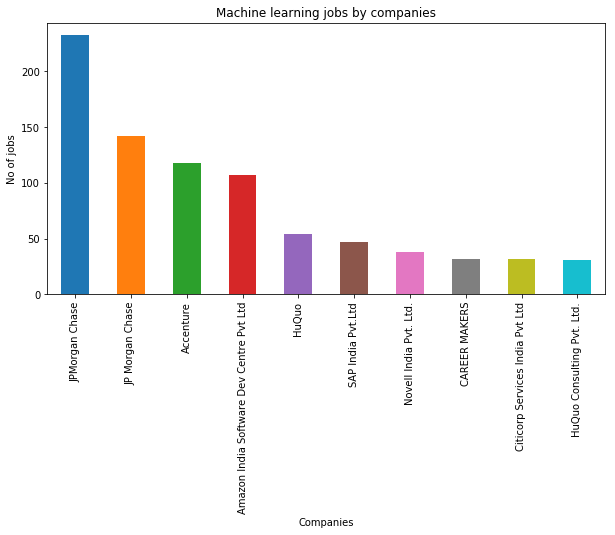

In [3]:
ax = dataset['Company'].value_counts().head(10).plot(kind='bar',
                                    figsize=(10,5),
                                    title="Machine learning jobs by companies")
ax.set_xlabel("Companies")
ax.set_ylabel("No of jobs")


### Machine learning jobs by companies

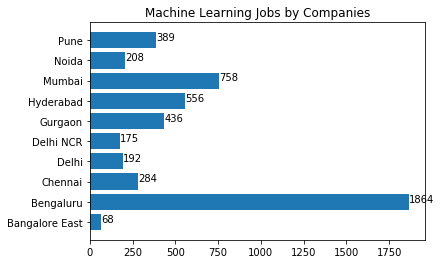

In [4]:
locationRow=dataset['Location']
locDict=dict()
for row in locationRow:
    locList=row.split(',')
    for loc in locList: 
        loc=re.sub("([\(\[]).*?([\)\]])", "", loc.strip())
        if loc not in locDict:
            locDict[loc]=1
        else:
            locDict[loc]=locDict[loc]+1

df=pandas.DataFrame([locDict.keys(),locDict.values()],index=['Location','Count']).T
df=df.sort_values('Count',ascending=0)


yvalues=df['Count'].head(10)
xvalues=df['Location'].head(10)



plt.barh(xvalues,yvalues)
plt.title('Machine Learning Jobs by Companies')

for x,y in zip(xvalues,yvalues):
    plt.text(y,x,str(y))


### Machine Learning In demand skill-set

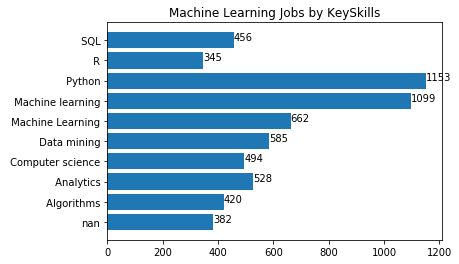

In [5]:
KeySkillsDict=dict()

for row in dataset['KeySkills']:
    ks=(str(row).split(','))
    for skill in ks:
        if skill not in KeySkillsDict:
            KeySkillsDict[skill]=1
        else:
            KeySkillsDict[skill]=KeySkillsDict[skill]+1

df=pandas.DataFrame([KeySkillsDict.keys(),KeySkillsDict.values()],index=['Skills','Count']).T
df=df.sort_values('Count',ascending=0)


yvalues=df['Count'].head(10)
xvalues=df['Skills'].head(10)



plt.barh(xvalues,yvalues)
plt.title('Machine Learning Jobs by KeySkills')

for x,y in zip(xvalues,yvalues):
    plt.text(y,x,str(y))